In [2]:
#important libraries for data wragling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## The dataset

In [3]:
data_dir = '../data'

merged_df = pd.read_csv(os.path.join(data_dir, 'all_merged.csv'))
merged_df.head()

,Unnamed: 0,lon_bounds,lat_bounds,year,burned_area,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,...,tasmax_7,pr_7,tas_8,tasmax_8,pr_8,lccs_class,processed_flag,current_pixel_state,observation_count,change_count
0,0,-10.0,51.75,2001,0.0,0.447948,1.0,12.3,16.5,39.000000,...,18.800001,79.000000,15.300000,18.9,102.1,130,1.0,1.0,89,0
1,1,-10.0,51.75,2002,0.0,0.447948,1.0,11.3,14.8,153.700000,...,17.700000,68.700005,15.400001,18.9,56.4,130,1.0,1.0,89,0
2,2,-10.0,51.75,2003,0.0,0.447948,1.0,11.1,14.5,119.200005,...,19.100000,87.200005,16.600000,20.5,17.2,130,1.0,1.0,89,0
3,3,-10.0,51.75,2004,0.0,0.447948,1.0,11.5,15.3,46.500000,...,18.200000,62.900000,16.000000,19.5,109.3,130,1.0,1.0,89,0
4,4,-10.0,51.75,2005,0.0,0.447948,1.0,10.8,14.3,109.200005,...,19.100000,71.700005,15.600000,19.2,56.9,130,1.0,1.0,89,0


## Computing the mean of tas, tasmax and pr for the 4months and adding to the dataframe

In [4]:
merged_df['tas_mean'] = merged_df[['tas_5', 'tas_6', 'tas_7', 'tas_8']].mean(axis=1)
merged_df['tasmax_mean'] = merged_df[['tasmax_5', 'tasmax_6', 'tasmax_7', 'tasmax_8']].mean(axis=1)
merged_df['pr_mean'] = merged_df[['pr_5', 'pr_6', 'pr_7', 'pr_8']].mean(axis=1)
merged_df.drop(columns=['Unnamed: 0', 'tas_5', 'tas_6', 'tas_7', 'tas_8', 'tasmax_5', 'tasmax_6', 'tasmax_7', 'tasmax_8', 'pr_5', 'pr_6', 'pr_7', 'pr_8'], inplace=True)


In [5]:
merged_df.head()

,lon_bounds,lat_bounds,year,burned_area,fraction_of_burnable_area,CL,lccs_class,processed_flag,current_pixel_state,observation_count,change_count,tas_mean,tasmax_mean,pr_mean
0,-10.0,51.75,2001,0.0,0.447948,1.0,130,1.0,1.0,89,0,14.075,17.800,70.000000
1,-10.0,51.75,2002,0.0,0.447948,1.0,130,1.0,1.0,89,0,13.550,16.900,94.800001
2,-10.0,51.75,2003,0.0,0.447948,1.0,130,1.0,1.0,89,0,14.500,18.000,81.175002
3,-10.0,51.75,2004,0.0,0.447948,1.0,130,1.0,1.0,89,0,14.150,17.775,74.025000
4,-10.0,51.75,2005,0.0,0.447948,1.0,130,1.0,1.0,89,0,14.200,17.625,73.900002


## Data visualization

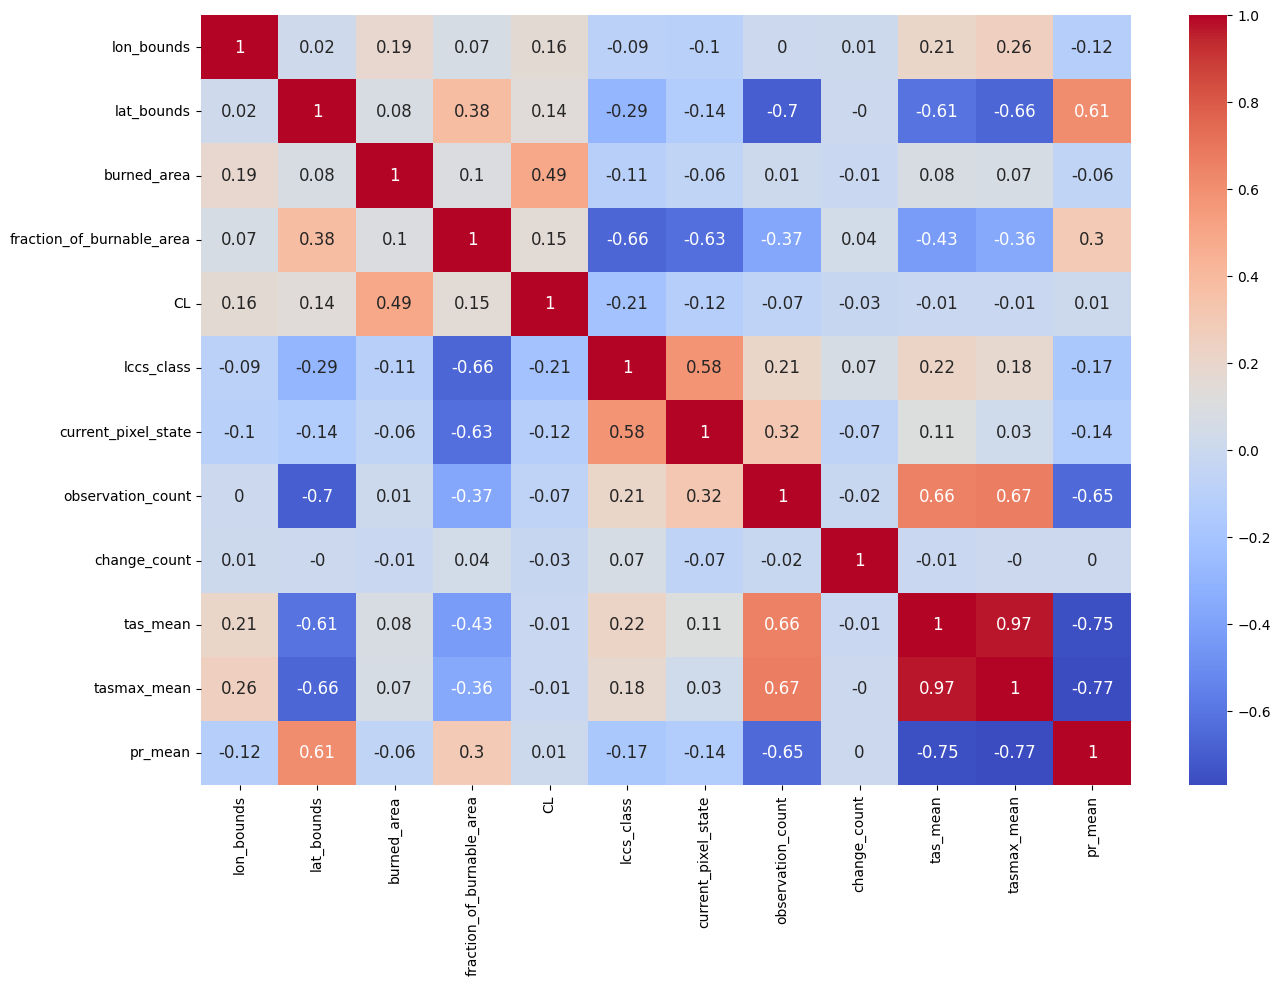

In [5]:
plt.figure(figsize = (15,10))
sns.heatmap(round(merged_df.drop(columns=['year', 'processed_flag']).corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

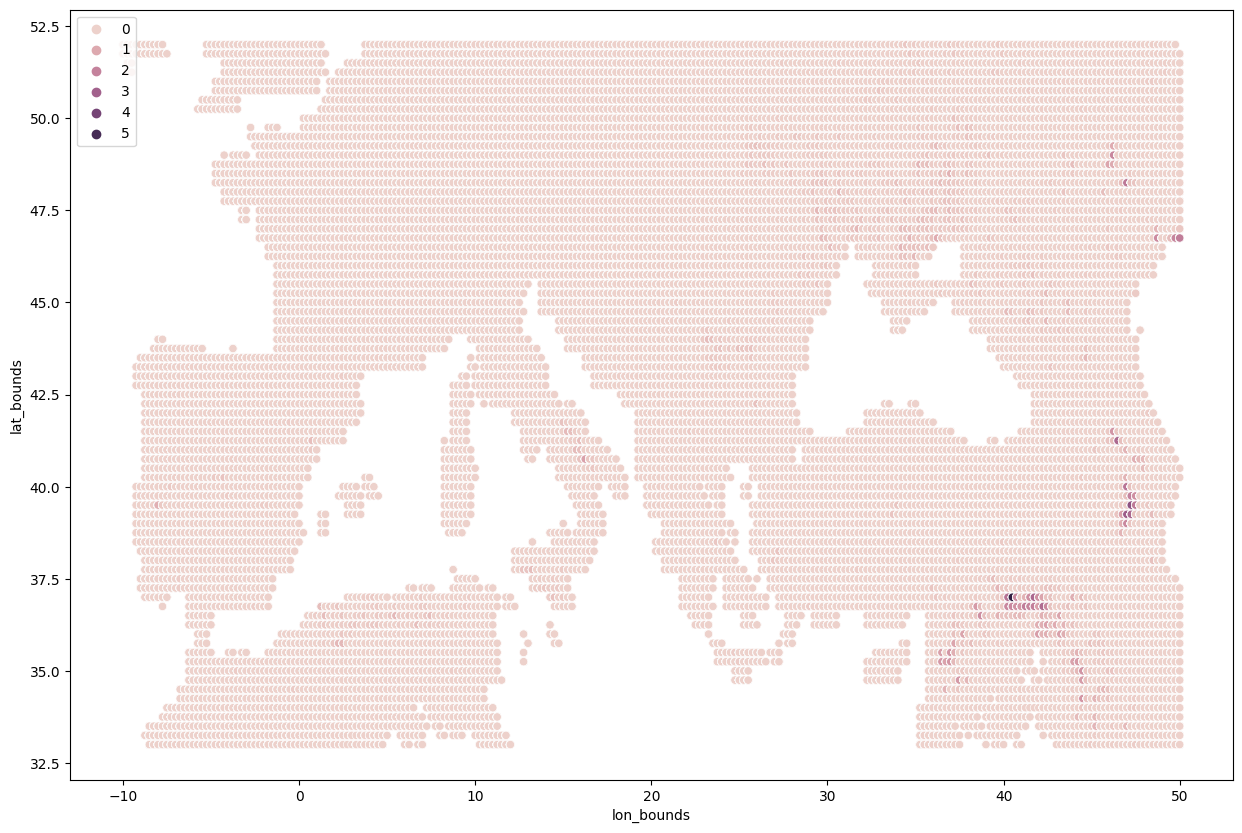

In [6]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=merged_df, x='lon_bounds', y='lat_bounds', hue = 'burned_area') 
plt.legend(loc='upper left');
plt.show()

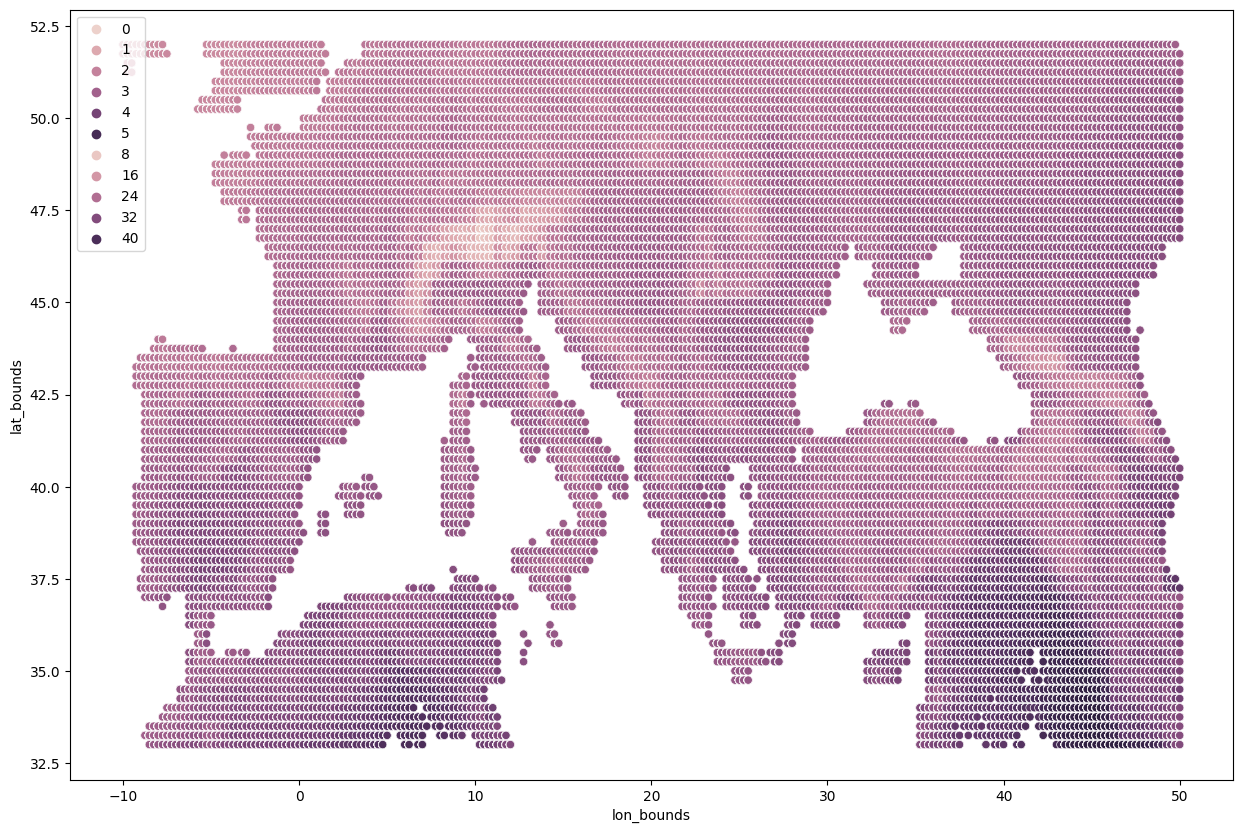

In [7]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=merged_df, x='lon_bounds', y='lat_bounds', hue = 'burned_area') 
sns.scatterplot(data=merged_df, x='lon_bounds', y='lat_bounds', hue = 'tasmax_mean')
# sns.scatterplot(data=merged_df, x='lon_bounds', y='lat_bounds', hue = 'pr_mean')
plt.legend(loc='upper left');
plt.show()

## Checking the basic info anout the dataset

In [6]:
# data manipulation
import numpy as np
pd.set_option("display.max_columns",None) # Show all columns of a Pandas DataFrame

# data visiualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical analysis
from statsmodels.graphics.gofplots import qqplot

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254137 entries, 0 to 254136
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   lon_bounds                 254137 non-null  float64
 1   lat_bounds                 254137 non-null  float64
 2   year                       254137 non-null  int64  
 3   burned_area                254137 non-null  float64
 4   fraction_of_burnable_area  254137 non-null  float64
 5   CL                         254137 non-null  float64
 6   lccs_class                 254137 non-null  int64  
 7   processed_flag             254137 non-null  float64
 8   current_pixel_state        254137 non-null  float64
 9   observation_count          254137 non-null  int64  
 10  change_count               254137 non-null  int64  
 11  tas_mean                   254137 non-null  float64
 12  tasmax_mean                254137 non-null  float64
 13  pr_mean                    25

## Having a glance at the target (burned_area)

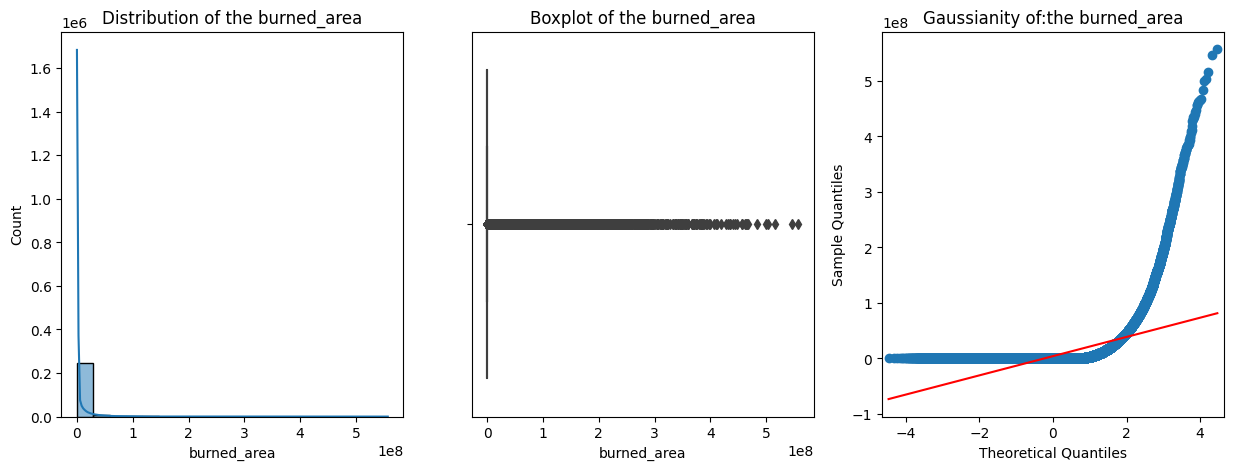

In [8]:
variable = 'burned_area'
y = merged_df[f"{variable}"]

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = merged_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = merged_df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(merged_df[f"{variable}"],line='s',ax=ax[2]);

In [9]:
merged_df.skew()

lon_bounds                  -0.101922
lat_bounds                  -0.172949
year                         0.000013
burned_area                  9.691182
fraction_of_burnable_area   -1.964687
CL                           6.136408
lccs_class                   0.726626
processed_flag               0.000000
current_pixel_state          2.813087
observation_count            0.084978
change_count                 3.675542
tas_mean                     0.381160
tasmax_mean                  0.447286
pr_mean                      1.256703
dtype: float64

In [10]:
merged_df.columns

Index(['lon_bounds', 'lat_bounds', 'year', 'burned_area',
       'fraction_of_burnable_area', 'CL', 'lccs_class', 'processed_flag',
       'current_pixel_state', 'observation_count', 'change_count', 'tas_mean',
       'tasmax_mean', 'pr_mean'],
      dtype='object')

In [11]:
X_num= merged_df.drop(columns = ['observation_count', 'burned_area', 'current_pixel_state', 'lat_bounds', 'lon_bounds', 'year', 'processed_flag'])

## Preprocessing the features with a pipeline

In [12]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer 
from sklearn import set_config; set_config(display='diagram')
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler,OneHotEncoder

In [13]:
num_transformer_simplified = make_pipeline(
                    SimpleImputer(strategy = "median"),
                    RobustScaler()
                )

num_transformer_simplified

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('robustscaler', RobustScaler())])

## The numerical Pipeline

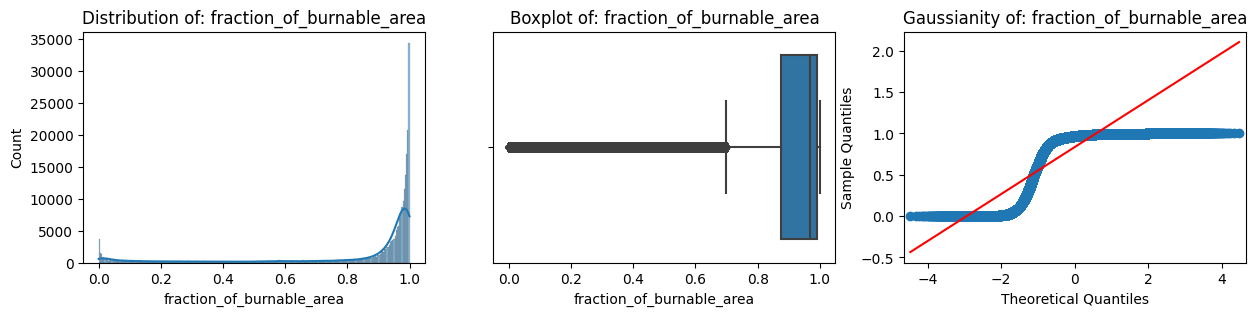

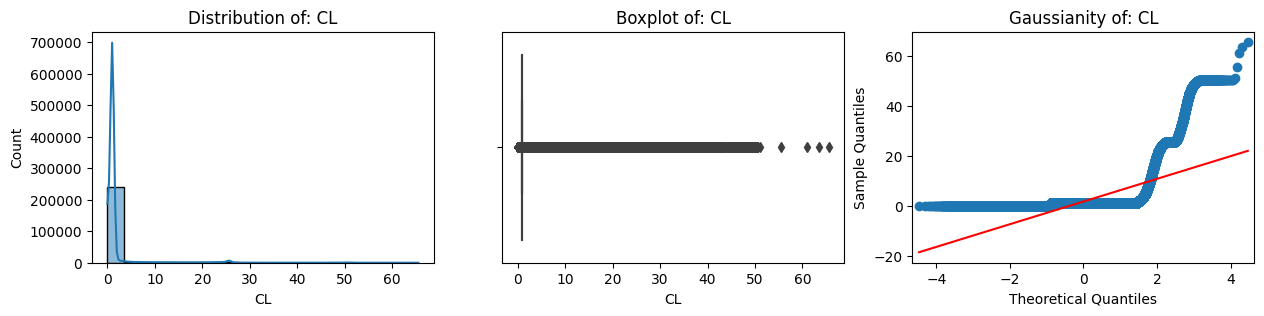

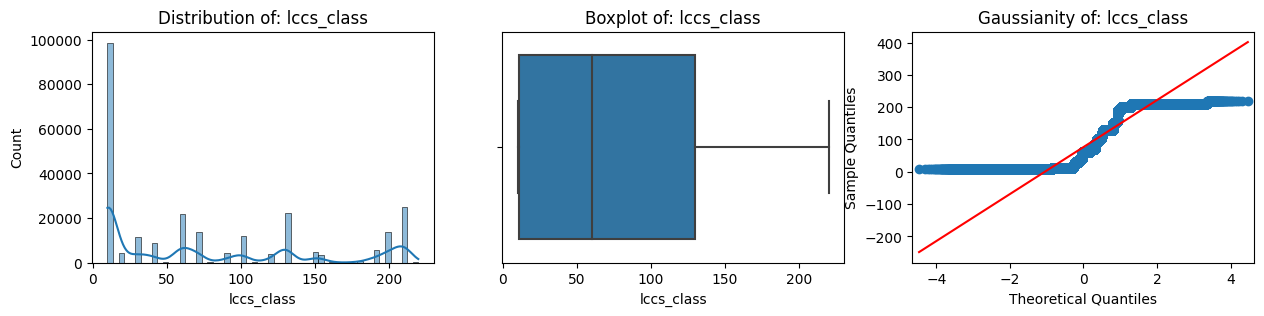

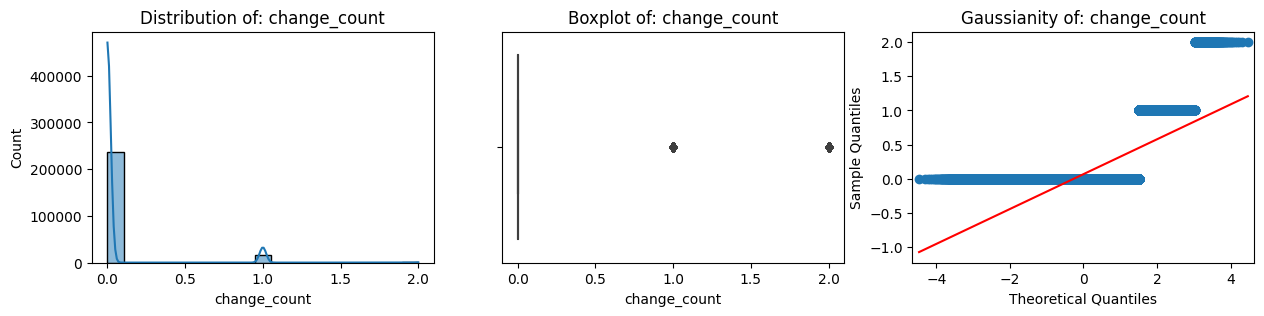

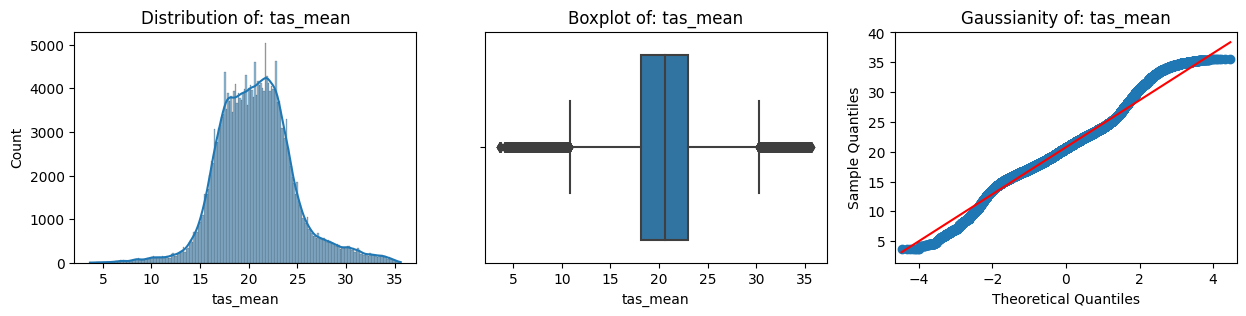

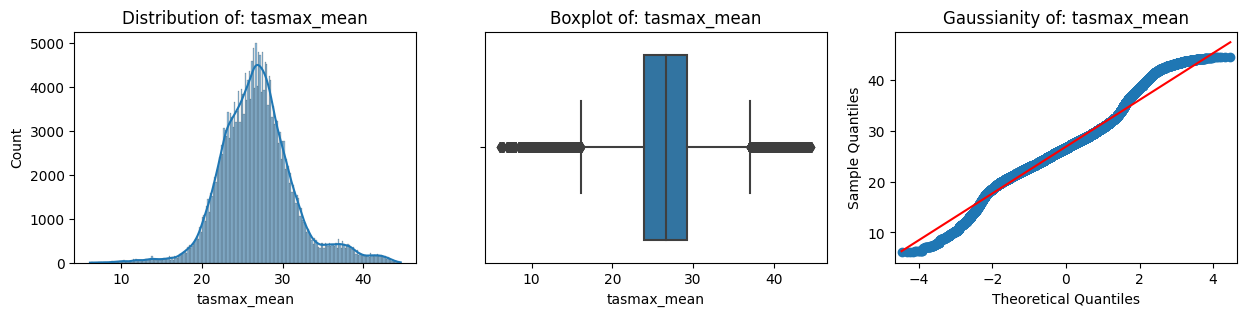

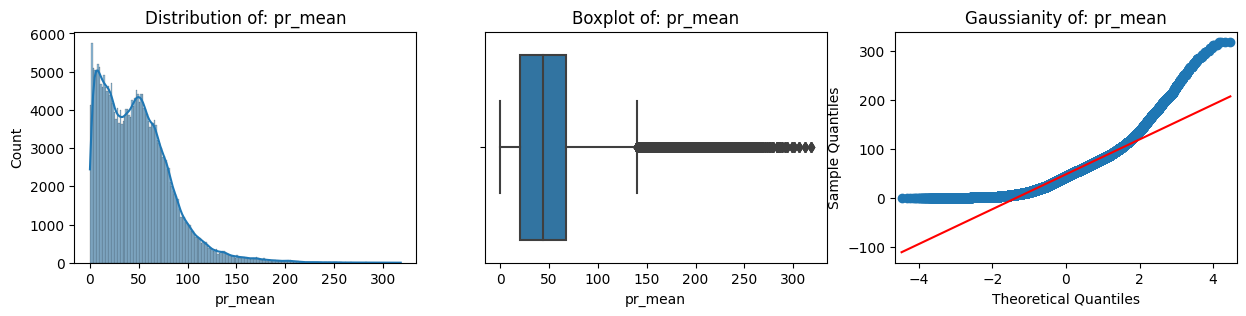

In [16]:
for numerical_feature in X_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = X_num, x = numerical_feature, kde=True, ax = ax[0])
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = X_num, x = numerical_feature, ax=ax[1])
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X_num[numerical_feature],line='s',ax=ax[2]);

In [14]:
 # The features_robust list consists of the features that will be scaled using robust scaler
 # The features_standard list consists of the features that will be scaled using the standard scaler list
 # The features_minmax list consists of the featurres that will be scaledd using MInMax scaler
 # The features_remaining consists of the features that will be procesed using OneHotEncoder

features_robust= ['pr_mean', 'tas_mean', 'tasmax_mean']
features_standard= ['fraction_of_burnable_area']
features_minmax= ['CL', 'change_count']
features_remaining = ['lccs_class']

In [15]:
X_num.shape[-1] == len(features_robust + features_standard + features_minmax + features_remaining)

True

In [16]:
scalers = ColumnTransformer(
                                [
                                    ("robust_scaler", RobustScaler(), features_robust),
                                    ("standard_scaler", StandardScaler(), features_standard),
                                    ("minmax_scaler", MinMaxScaler(), features_minmax)
                                ], remainder='passthrough'
)

In [17]:
num_transformer = make_pipeline(
                    SimpleImputer(strategy = "median"),                    
                    scalers
                )

num_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['pr_mean', 'tas_mean',
                                                   'tasmax_mean']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['fraction_of_burnable_area']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['CL', 'change_count'])]))])

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin


class  ColumnNameExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, *_):
        return self

    def transform(self, X, *_):
        return pd.DataFrame(X, columns = self.columns)
    
    def fit_transform(self, X, *_):
        return pd.DataFrame(X, columns = self.columns)
    
imputer_with_name = make_pipeline(
    SimpleImputer(strategy="median"),
    ColumnNameExtractor(features_robust + features_standard + features_minmax +
                        features_remaining),
)

pd.DataFrame(imputer_with_name.fit_transform(X_num)).head()

,pr_mean,tas_mean,tasmax_mean,fraction_of_burnable_area,CL,change_count,lccs_class
0,0.447948,1.0,130.0,0.0,14.075,17.800,70.000000
1,0.447948,1.0,130.0,0.0,13.550,16.900,94.800001
2,0.447948,1.0,130.0,0.0,14.500,18.000,81.175002
3,0.447948,1.0,130.0,0.0,14.150,17.775,74.025000
4,0.447948,1.0,130.0,0.0,14.200,17.625,73.900002


In [19]:
class CustomSimpleImputer(SimpleImputer):
    def fit(self, X, *args, **kwargs):
        self.columns = X.columns
        return super().fit(X, *args, **kwargs) 
    
    def transform(self, *args, **kwargs):
        return pd.DataFrame(super().transform(*args, **kwargs), columns=self.columns)
    
    def fit_transform(self, *args, **kwargs):
        return pd.DataFrame(super().fit_transform(*args, **kwargs), columns=self.columns)

imputer_with_name = CustomSimpleImputer(strategy='median')

pd.DataFrame(imputer_with_name.fit_transform(X_num)).head()

,fraction_of_burnable_area,CL,lccs_class,change_count,tas_mean,tasmax_mean,pr_mean
0,0.447948,1.0,130.0,0.0,14.075,17.800,70.000000
1,0.447948,1.0,130.0,0.0,13.550,16.900,94.800001
2,0.447948,1.0,130.0,0.0,14.500,18.000,81.175002
3,0.447948,1.0,130.0,0.0,14.150,17.775,74.025000
4,0.447948,1.0,130.0,0.0,14.200,17.625,73.900002


In [20]:
# we override existing class
from sklearn.impute import SimpleImputer
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)
imputer_with_name = SimpleImputer(strategy='median')
pd.DataFrame(imputer_with_name.fit_transform(X_num), columns = imputer_with_name.get_feature_names_out())

,fraction_of_burnable_area,CL,lccs_class,change_count,tas_mean,tasmax_mean,pr_mean
0,0.447948,1.0,130.0,0.0,14.075,17.800000,70.000000
1,0.447948,1.0,130.0,0.0,13.550,16.900000,94.800001
2,0.447948,1.0,130.0,0.0,14.500,18.000000,81.175002
3,0.447948,1.0,130.0,0.0,14.150,17.775000,74.025000
4,0.447948,1.0,130.0,0.0,14.200,17.625000,73.900002
...,...,...,...,...,...,...,...
254132,0.993698,1.0,10.0,0.0,21.200,27.300000,29.800000
254133,0.993698,1.0,10.0,0.0,21.575,28.125000,32.800000
254134,0.993698,1.0,10.0,0.0,20.225,26.125000,34.300000
254135,0.993698,1.0,10.0,0.0,21.225,27.825001,22.850000


In [21]:
num_transformer = make_pipeline(
                    CustomSimpleImputer(strategy='median'),
                    ColumnTransformer(
                                [
                                    ("robust_scaler", RobustScaler(), features_robust),
                                    ("standard_scaler", StandardScaler(), features_standard),
                                    ("minmax_scaler", MinMaxScaler(), features_minmax),
                                    ])
                )

num_transformer.fit(X_num)
num_transformer.transform(X_num)

array([[ 0.54238168, -1.33846166, -1.69047619, -1.36359236,  0.01526718,
         0.        ],
       [ 1.05824233, -1.44615397, -1.86190481, -1.36359236,  0.01526718,
         0.        ],
       [ 0.77483102, -1.25128222, -1.652381  , -1.36359236,  0.01526718,
         0.        ],
       ...,
       [-0.20020801, -0.07692318, -0.10476195,  0.55669681,  0.01526718,
         0.        ],
       [-0.43837754,  0.12820503,  0.21904767,  0.55669681,  0.01526718,
         0.        ],
       [-0.27405096,  0.04102559,  0.09047619,  0.55669681,  0.01526718,
         0.        ]])

In [22]:
class CustomColumnTransformer(ColumnTransformer):
    
    def fit(self, *args, **kwargs):
        return super().fit(*args, **kwargs)
    
    def transform(self, X, *args, **kwargs):
        return pd.DataFrame(super().transform(X, *args, **kwargs), columns=self.get_feature_names_out())
    
    def fit_transform(self, X, *args, **kwargs):
        return pd.DataFrame(super().fit_transform(X, *args, **kwargs), columns=self.get_feature_names_out())

In [23]:
num_transformer = make_pipeline(
                    CustomSimpleImputer(strategy = "median"),
                    CustomColumnTransformer(
                                [
                                    ("robust_scaler", RobustScaler(), features_robust),
                                    ("standard_scaler", StandardScaler(), features_standard),
                                    ("minmax_scaler", MinMaxScaler(), features_minmax)
                                ])
                )

num_transformer.fit(X_num)
num_transformer.transform(X_num)
num_transformer.fit_transform(X_num)

,robust_scaler__pr_mean,robust_scaler__tas_mean,robust_scaler__tasmax_mean,standard_scaler__fraction_of_burnable_area,minmax_scaler__CL,minmax_scaler__change_count
0,0.542382,-1.338462,-1.690476,-1.363592,0.015267,0.0
1,1.058242,-1.446154,-1.861905,-1.363592,0.015267,0.0
2,0.774831,-1.251282,-1.652381,-1.363592,0.015267,0.0
3,0.626105,-1.323077,-1.695238,-1.363592,0.015267,0.0
4,0.623505,-1.312821,-1.723810,-1.363592,0.015267,0.0
...,...,...,...,...,...,...
254132,-0.293812,0.123077,0.119048,0.556697,0.015267,0.0
254133,-0.231409,0.200000,0.276190,0.556697,0.015267,0.0
254134,-0.200208,-0.076923,-0.104762,0.556697,0.015267,0.0
254135,-0.438378,0.128205,0.219048,0.556697,0.015267,0.0


# Categorical Pipeline

In [27]:
# using OneHotEncoder
cat_transformer = make_pipeline(
                    OneHotEncoder(sparse = False, handle_unknown = "ignore", drop='if_binary')
                )

cat_transformer

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse=False))])

In [28]:
X_cat = (merged_df[['lccs_class']])

In [29]:
X_cat_encoded = pd.DataFrame(cat_transformer.fit_transform(X_cat))
X_cat_encoded

/home/ademmanuel_01/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254133,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.preprocessing import OneHotEncoder
class CustomOHE(OneHotEncoder):
    def fit(self, *args, **kwargs):
        return super().fit(*args, **kwargs) 
    
    def transform(self,*args, **kwargs):
        return pd.DataFrame(super().transform(*args, **kwargs), columns=self.get_feature_names_out())

    def fit_transform(self,*args, **kwargs):
        return pd.DataFrame(super().fit_transform(*args, **kwargs), columns=self.get_feature_names_out())

cat_transformer = make_pipeline(
                    CustomSimpleImputer(strategy = "most_frequent"),
                    CustomOHE(sparse = False, handle_unknown = "ignore", drop='if_binary')
                )
X_cat_encoded = pd.DataFrame(cat_transformer.fit_transform(X_cat))
X_cat_encoded.shape

/home/ademmanuel_01/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(254137, 27)

## Full Preprocessor by combining both num_transformer and Cat_transformer

In [31]:
preprocessor_with_OHE = make_pipeline(
                CustomColumnTransformer([
                    ("num_transformer", num_transformer, make_column_selector(dtype_include = ["float64","int64"])),
                    ("cat_transformer", cat_transformer, make_column_selector())
                    ])
                )

preprocessor_with_OHE

Pipeline(steps=[('customcolumntransformer',
                 CustomColumnTransformer(transformers=[('num_transformer',
                                                        Pipeline(steps=[('customsimpleimputer',
                                                                         CustomSimpleImputer(strategy='median')),
                                                                        ('customcolumntransformer',
                                                                         CustomColumnTransformer(transformers=[('robust_scaler',
                                                                                                                RobustScaler(),
                                                                                                                ['pr_mean',
                                                                                                                 'tas_mean',
                                                                                                                 'tasmax_mean']),
                                                                                                               ('standard_scaler',
                                                                                                                StandardScaler(),...
                                                        <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2d943e230>),
                                                       ('cat_transformer',
                                                        Pipeline(steps=[('customsimpleimputer',
                                                                         CustomSimpleImputer(strategy='most_frequent')),
                                                                        ('customohe',
                                                                         CustomOHE(drop='if_binary',
                                                                                   handle_unknown='ignore',
                                                                                   sparse=False,
                                                                                   sparse_output=False))]),
                                                        <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2d943fa60>)]))])

In [24]:
preprocessor = make_pipeline(
                CustomColumnTransformer([
                    ("num_transformer", num_transformer, make_column_selector(dtype_include = ["float64","int64"])),
                
                    ])
                )

preprocessor

Pipeline(steps=[('customcolumntransformer',
                 CustomColumnTransformer(transformers=[('num_transformer',
                                                        Pipeline(steps=[('customsimpleimputer',
                                                                         CustomSimpleImputer(strategy='median')),
                                                                        ('customcolumntransformer',
                                                                         CustomColumnTransformer(transformers=[('robust_scaler',
                                                                                                                RobustScaler(),
                                                                                                                ['pr_mean',
                                                                                                                 'tas_mean',
                                                                                                                 'tasmax_mean']),
                                                                                                               ('standard_scaler',
                                                                                                                StandardScaler(),
                                                                                                                ['fraction_of_burnable_area']),
                                                                                                               ('minmax_scaler',
                                                                                                                MinMaxScaler(),
                                                                                                                ['CL',
                                                                                                                 'change_count'])]))]),
                                                        <sklearn.compose._column_transformer.make_column_selector object at 0x7f125d756b90>)]))])

In [25]:
fully_preprocessed_dataset = pd.DataFrame(preprocessor.fit_transform(merged_df))
fully_preprocessed_dataset 

,num_transformer__robust_scaler__pr_mean,num_transformer__robust_scaler__tas_mean,num_transformer__robust_scaler__tasmax_mean,num_transformer__standard_scaler__fraction_of_burnable_area,num_transformer__minmax_scaler__CL,num_transformer__minmax_scaler__change_count
0,0.542382,-1.338462,-1.690476,-1.363592,0.015267,0.0
1,1.058242,-1.446154,-1.861905,-1.363592,0.015267,0.0
2,0.774831,-1.251282,-1.652381,-1.363592,0.015267,0.0
3,0.626105,-1.323077,-1.695238,-1.363592,0.015267,0.0
4,0.623505,-1.312821,-1.723810,-1.363592,0.015267,0.0
...,...,...,...,...,...,...
254132,-0.293812,0.123077,0.119048,0.556697,0.015267,0.0
254133,-0.231409,0.200000,0.276190,0.556697,0.015267,0.0
254134,-0.200208,-0.076923,-0.104762,0.556697,0.015267,0.0
254135,-0.438378,0.128205,0.219048,0.556697,0.015267,0.0


# Full Pipeline with Regression Model

##### For the simple model testing, fire_regression_models consists of preprocessor pipeline which doesn't have categorical encoder

In [26]:
def fire_regression_models(regression_model):
    piped_regressor = make_pipeline(preprocessor, regression_model)
    return piped_regressor

In [27]:
from sklearn.linear_model import *
fire_regression_models(LogisticRegression())

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('customcolumntransformer',
                                  CustomColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('customsimpleimputer',
                                                                                          CustomSimpleImputer(strategy='median')),
                                                                                         ('customcolumntransformer',
                                                                                          CustomColumnTransformer(transformers=[('robust_scaler',
                                                                                                                                 RobustScaler(),
                                                                                                                                 ['pr_mean',
                                                                                                                                  'tas_mean',
                                                                                                                                  'tasmax_mean']),
                                                                                                                                ('standard_scaler',
                                                                                                                                 StandardScaler(),
                                                                                                                                 ['fraction_of_burnable_area']),
                                                                                                                                ('minmax_scaler',
                                                                                                                                 MinMaxScaler(),
                                                                                                                                 ['CL',
                                                                                                                                  'change_count'])]))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f125d756b90>)]))])),
                ('logisticregression', LogisticRegression())])

In [28]:
# LINEAR MODELS
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier

# NEIGHBORS
from sklearn.neighbors import KNeighborsRegressor

# SVM
from sklearn.svm import SVR

# TREES AND ENSEMBLE METHODS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [29]:
models_used = [LinearRegression(),
          SGDRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
               SGDClassifier(),
               
]

In [30]:
models_names = ["linear_regression",
                "sgd_regressor",
                "random_forest_regressor",
                "gradient_boosting_regressor",
                "sdg_classifier",
]

In [31]:
# Libraries for evaluating the pipelined models and to check which model performs best
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [32]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X_num, y)
different_r2_scores = []

for model_name, model in zip(models_names, models_used):

    temp_piped_regressor = fire_regression_models(model)
    temp_piped_regressor.fit(X_train, y_train)
    y_pred = temp_piped_regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    different_r2_scores.append(r2_score(y_test, y_pred))
    # different_r2_scores.append(temp_piped_regressor.r2_score(X_test, y_test))
    

comparing_regression_models = pd.DataFrame(list(zip(models_names, different_r2_scores)),
                                                columns =['model_name', 'r2_score'])

round(comparing_regression_models.sort_values(by = "r2_score", ascending = False),2)

CPU times: user 23min 1s, sys: 10.1 s, total: 23min 11s
Wall time: 23min 15s


,model_name,r2_score
2,random_forest_regressor,0.44
3,gradient_boosting_regressor,0.40
0,linear_regression,0.24
1,sgd_regressor,0.24
4,sdg_classifier,-0.02


In [ ]:
%%time

different_test_scores_cv = []

for model_name, model in zip(models_names, models_used):

    temp_piped_regressor = fire_regression_models(model)
    different_test_scores_cv.append(cross_val_score(temp_piped_regressor, merged_df, y).mean())

comparing_regression_models_cv = pd.DataFrame(list(zip(models_names, different_test_scores)),
                                                columns = ['model_name', 'cross_val_score'])

round(comparing_regression_models_cv.sort_values(by = "cross_val_score", ascending = False),2)